In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from subprocess import check_output             # utf-8 e uygun olup olmadigini arastirmak icin bunu aratiyoruz
print(check_output(["ls","./input"]).decode("utf8"))
        
        
# Any results you write to the current directory are saved as output.

./input/orbits.csv
./input/impacts.csv
impacts.csv
orbits.csv



In [8]:
data1 = pd.read_csv('./input/impacts.csv')
data2 = pd.read_csv('./input/orbits.csv')
data1.info()
data2.info()
             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15

In [9]:
data = pd.concat([data1, data2], axis=1, sort=False)
data.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']
data.columns
# print(data)

Index(['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)', 'Perihelion_Distance(AU)',
       'Aphelion_Distance(AU)', 'Orbital_Period(yr)',
       'Minimum_Orbit_Intersection_Distance(AU)', 'Orbital_Reference',
       'Asteroid_Magnitude'],
      dtype='object')

In [10]:
data1.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale']
data1.head()

,Object_Name,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale,Maximum_Torino_Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object_Name                    683 non-null    object 
 1   Period_Start                   683 non-null    int64  
 2   Period_End                     683 non-null    int64  
 3   Possible_Impacts               683 non-null    int64  
 4   Cumulative_Impact_Probability  683 non-null    float64
 5   Asteroid_Velocity              683 non-null    float64
 6   Asteroid_Magnitude             683 non-null    float64
 7   Asteroid_Diameter(km)          683 non-null    float64
 8   Cumulative_Palermo_Scale       683 non-null    float64
 9   Maximum_Palermo_Scale          683 non-null    float64
 10  Maximum_Torino_Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [12]:
data1.Period_End.value_counts()

2115    95
2114    78
2113    44
2111    32
2112    29
        ..
2017     1
2880     1
2199     1
2198     1
2048     1
Name: Period_End, Length: 93, dtype: int64

In [13]:
data1.Object_Name.head(50).unique()

array(['2006 WP1', '2013 YB', '2008 US', '2010 VR139', '2015 ME131',
       '2010 XB73', '2005 TM173', '2006 SF281', '2010 VP139',
       '2014 HR197', '2015 HV182', '2008 SH148', '2008 XK', '2010 XC',
       '2010 MY112', '2014 MO68', '2009 FZ4', '2008 VS4', '2009 VZ39',
       '2014 JT79', '2008 VL', '2010 WW8', '2008 EM68', '2015 HW182',
       '2012 BP123', '2008 EK68', '2005 ED224', '2014 MV67', '2016 JT38',
       '2008 JD33', '2005 NX55', '2008 UY91', '2014 OY391', '2010 JA43',
       '2015 HS182', '2011 CF66', '2016 AZ193', '2016 JO38', '2014 HD198',
       '2006 QV89', '2008 VB4', '2008 UV99', '2010 DJ77', '2014 ML67',
       '2004 ME6', '2007 FT3', '2014 MA68', '2016 RP41', '2012 BL14',
       '2014 HN198'], dtype=object)

In [14]:
object_list = list(data1['Object_Name'].head(50).unique())
# print(object_list)

Period_Start_ratio = []
for i in object_list:
    x = data1[data1['Object_Name']==i]
    Period_Start_rate = sum(x.Period_Start)/len(x)
    Period_Start_ratio.append(Period_Start_rate)
data3 = pd.DataFrame({'object_list': object_list,'Period_Start_ratio':Period_Start_ratio})


# Duzenlenen datayi yeniden index lememiz gerekiyor ki duzenli gorunsun!!! Bunun icin:

new_index = (data3['Period_Start_ratio'].sort_values(ascending=False)).index.values
sorted_data = data3.reindex(new_index)

Text(0.5,1,'Period Start for Object')

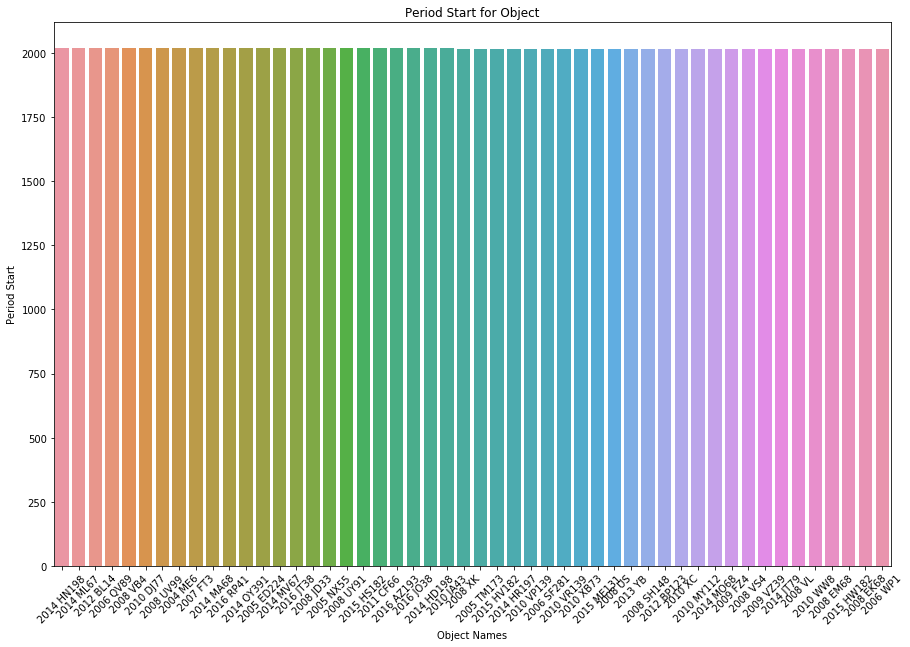

In [15]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['object_list'], y=sorted_data['Period_Start_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Object Names')
plt.ylabel('Period Start')
plt.title('Period Start for Object')

In [16]:
data2.columns = ['Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']

data2.head()


,Object_Name,Object_Classification,Epoch(TDB),Orbit_Axis(AU),Orbit_Eccentricity,Orbit_Inclination(deg),Perihelion_Argument(deg),Node_Longitude(deg),Mean_Anomoly(deg),Perihelion_Distance(AU),Aphelion_Distance(AU),Orbital_Period(yr),Minimum_Orbit_Intersection_Distance(AU),Orbital_Reference,Asteroid_Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Object_Name                              15635 non-null  object 
 1   Object_Classification                    15635 non-null  object 
 2   Epoch(TDB)                               15635 non-null  int64  
 3   Orbit_Axis(AU)                           15635 non-null  float64
 4   Orbit_Eccentricity                       15635 non-null  float64
 5   Orbit_Inclination(deg)                   15635 non-null  float64
 6   Perihelion_Argument(deg)                 15635 non-null  float64
 7   Node_Longitude(deg)                      15635 non-null  float64
 8   Mean_Anomoly(deg)                        15635 non-null  float64
 9   Perihelion_Distance(AU)                  15635 non-null  float64
 10  Aphelion_Distance(AU)                    15635

In [18]:
data2.Object_Name.value_counts()

(2008 XV2)             1
164341 (2005 CO)       1
414772 (2010 OC103)    1
(2015 SB)              1
(2015 HQ43)            1
                      ..
(2003 GD)              1
(2016 TD)              1
(2008 CX118)           1
265196 (2004 BW58)     1
415715 (1999 AU23)     1
Name: Object_Name, Length: 15635, dtype: int64

In [19]:
name_count = Counter(data2.Object_Name)
# print(name_count)
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# print(most_common_names)


[('433\xa0Eros', 1), ('719\xa0Albert', 1), ('887\xa0Alinda', 1), ('1036\xa0Ganymed', 1), ('1221\xa0Amor', 1), ('1566\xa0Icarus', 1), ('1580\xa0Betulia', 1), ('1620\xa0Geographos', 1), ('1627\xa0Ivar', 1), ('1685\xa0Toro', 1), ('1862\xa0Apollo', 1), ('1863\xa0Antinous', 1), ('1864\xa0Daedalus', 1), ('1865\xa0Cerberus', 1), ('1866\xa0Sisyphus', 1)]


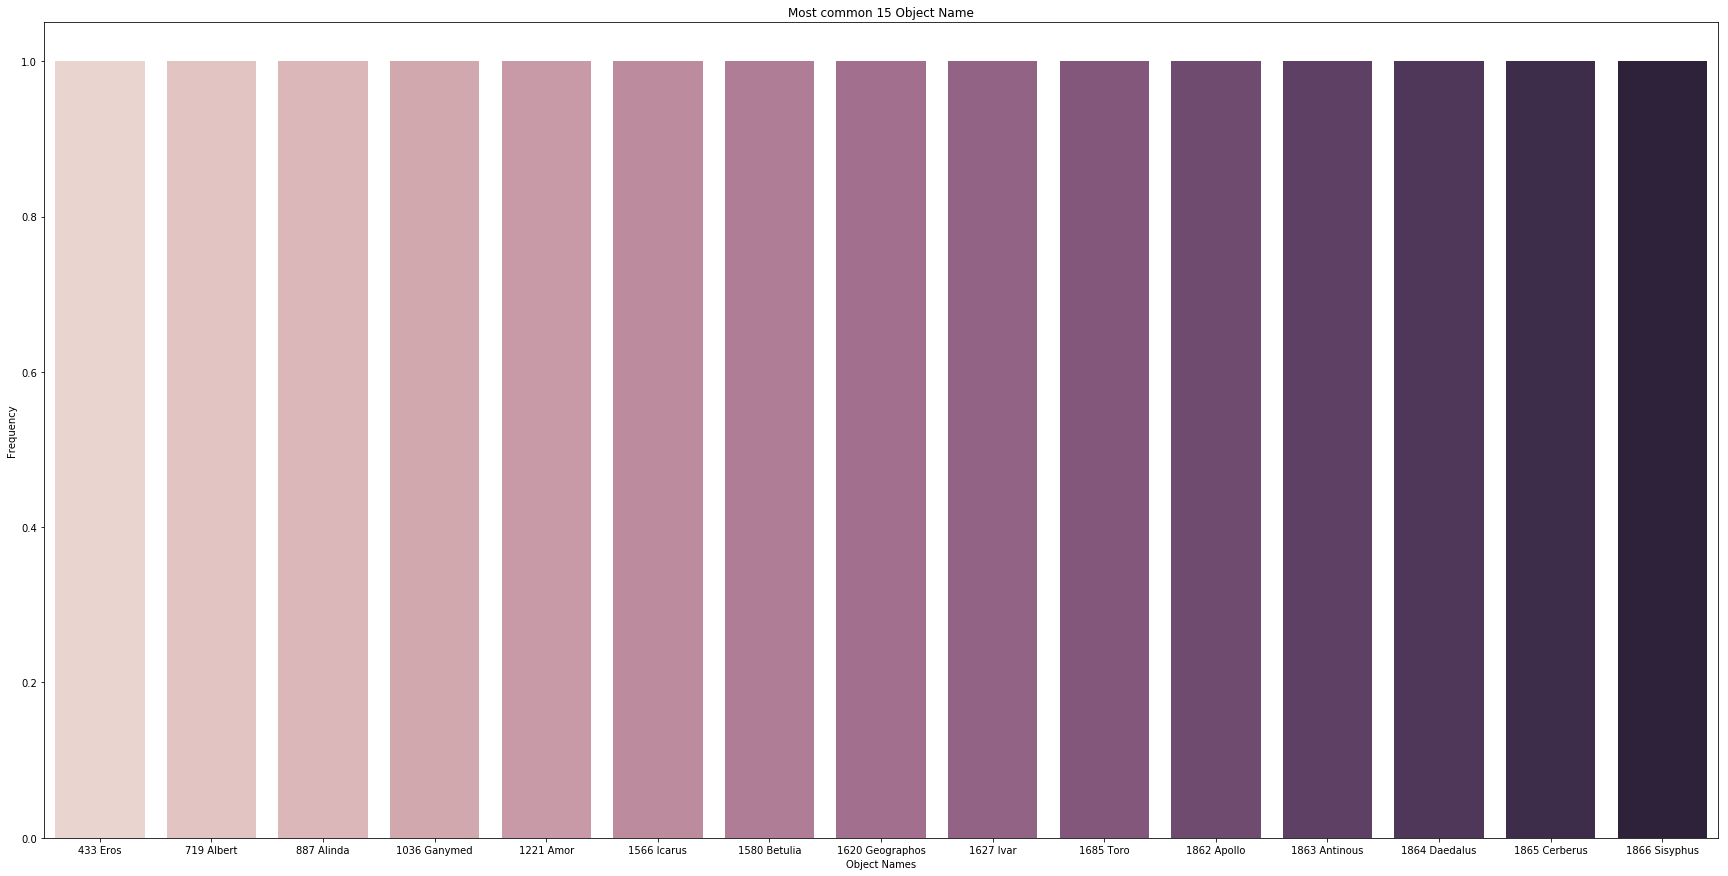

In [20]:
# PLOT unu cizelim

plt.figure(figsize=(30,15))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Object Names')
plt.ylabel('Frequency')
plt.title('Most common 15 Object Name')
print(most_common_names)


In [21]:
data2.head()

,Object_Name,Object_Classification,Epoch(TDB),Orbit_Axis(AU),Orbit_Eccentricity,Orbit_Inclination(deg),Perihelion_Argument(deg),Node_Longitude(deg),Mean_Anomoly(deg),Perihelion_Distance(AU),Aphelion_Distance(AU),Orbital_Period(yr),Minimum_Orbit_Intersection_Distance(AU),Orbital_Reference,Asteroid_Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [25]:
Period_End_ratio = []
for i in object_list:
    x = data1[data1['Object_Name']==i]
    Period_End_rate = sum(x.Period_End)/len(x)
    Period_End_ratio.append(Period_End_rate)
data4 = pd.DataFrame({'object_list': object_list,'Period_End_ratio': Period_End_ratio})


# Duzenlenen datayi yeniden index lememiz gerekiyor ki duzenli gorunsun!!! Bunun icin:

new_index = (data4['Period_End_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data4.reindex(new_index)

Text(0.5,1,'Period End for Object')

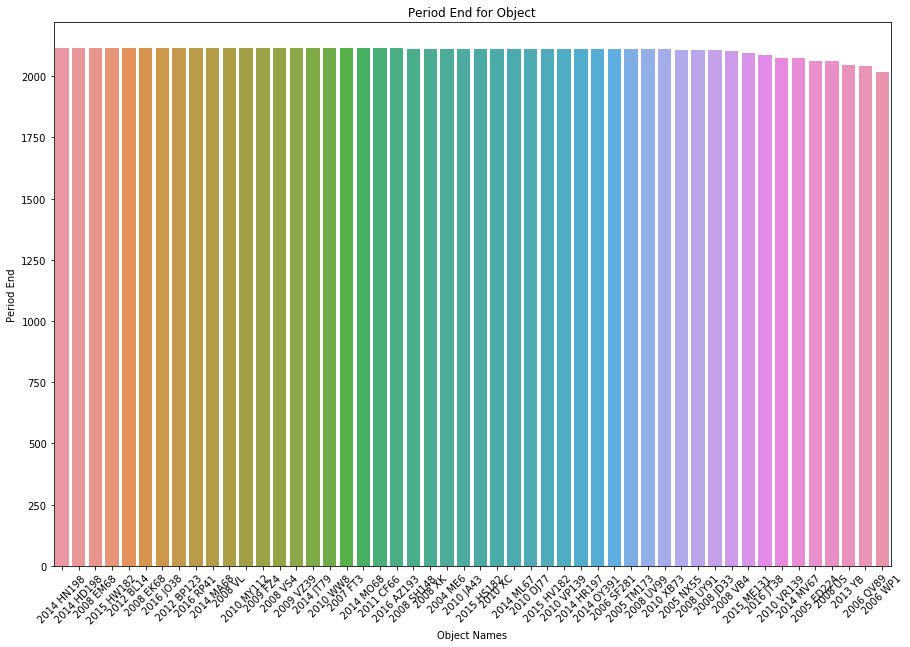

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['object_list'], y=sorted_data2['Period_End_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Object Names')
plt.ylabel('Period End')
plt.title('Period End for Object')

In [27]:
data1.head()

,Object_Name,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale,Maximum_Torino_Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [28]:
Cumulative_Impact_Probability = []
Asteroid_Velocity = []
Asteroid_Magnitude = []
# Asteroid_Diameter = []
Possible_Impacts = []
for i in object_list:
    x = data1[data1['Object_Name']==i]
    Cumulative_Impact_Probability.append(sum(x.Cumulative_Impact_Probability)/len(x))
    Asteroid_Velocity.append(sum(x.Asteroid_Velocity) / len(x))
    Asteroid_Magnitude.append(sum(x.Asteroid_Magnitude) / len(x))
#     Asteroid_Diameter.append(sum(x.Asteroid_Diameter) / len(x))
    Possible_Impacts.append(sum(x.Possible_Impacts) / len(x))

[Text(0,0.5,'Asteroids'),
 Text(0.5,0,'Percentage of Asteroids'),
 Text(0.5,1,'Percentage of Asteroid Names ')]

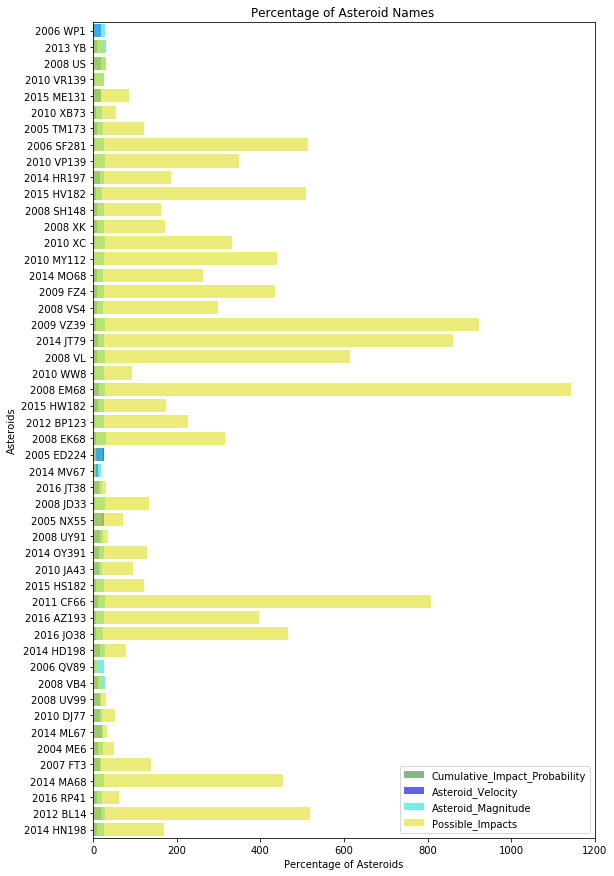

In [29]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=Cumulative_Impact_Probability,y=object_list,color='green',alpha = 0.5,label='Cumulative_Impact_Probability' )
sns.barplot(x=Asteroid_Velocity,y=object_list,color='blue',alpha = 0.7,label='Asteroid_Velocity')
sns.barplot(x=Asteroid_Magnitude,y=object_list,color='cyan',alpha = 0.6,label='Asteroid_Magnitude')
sns.barplot(x=Possible_Impacts,y=object_list,color='yellow',alpha = 0.6,label='Possible_Impacts')
# sns.barplot(x=share_hispanic,y=object_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Asteroids', ylabel='Asteroids',title = "Percentage of Asteroid Names ")

In [30]:
data3.head()

,object_list,Period_Start_ratio
0,2006 WP1,2017.0
1,2013 YB,2017.0
2,2008 US,2017.0
3,2010 VR139,2017.0
4,2015 ME131,2017.0


In [31]:
sorted_data['Period_Start_ratio'] = sorted_data['Period_Start_ratio']/max( sorted_data['Period_Start_ratio'])
sorted_data2['Period_End_ratio'] = sorted_data2['Period_End_ratio']/max( sorted_data2['Period_End_ratio'])
data4 = pd.concat([sorted_data,sorted_data2['Period_End_ratio']],axis=1)
data4.sort_values('Period_Start_ratio',inplace=True)

In [32]:
data4.head()


,object_list,Period_Start_ratio,Period_End_ratio
0,2006 WP1,0.999009,0.953664
25,2008 EK68,0.999009,1.000000
23,2015 HW182,0.999009,1.000000
22,2008 EM68,0.999009,1.000000
21,2010 WW8,0.999009,0.999527


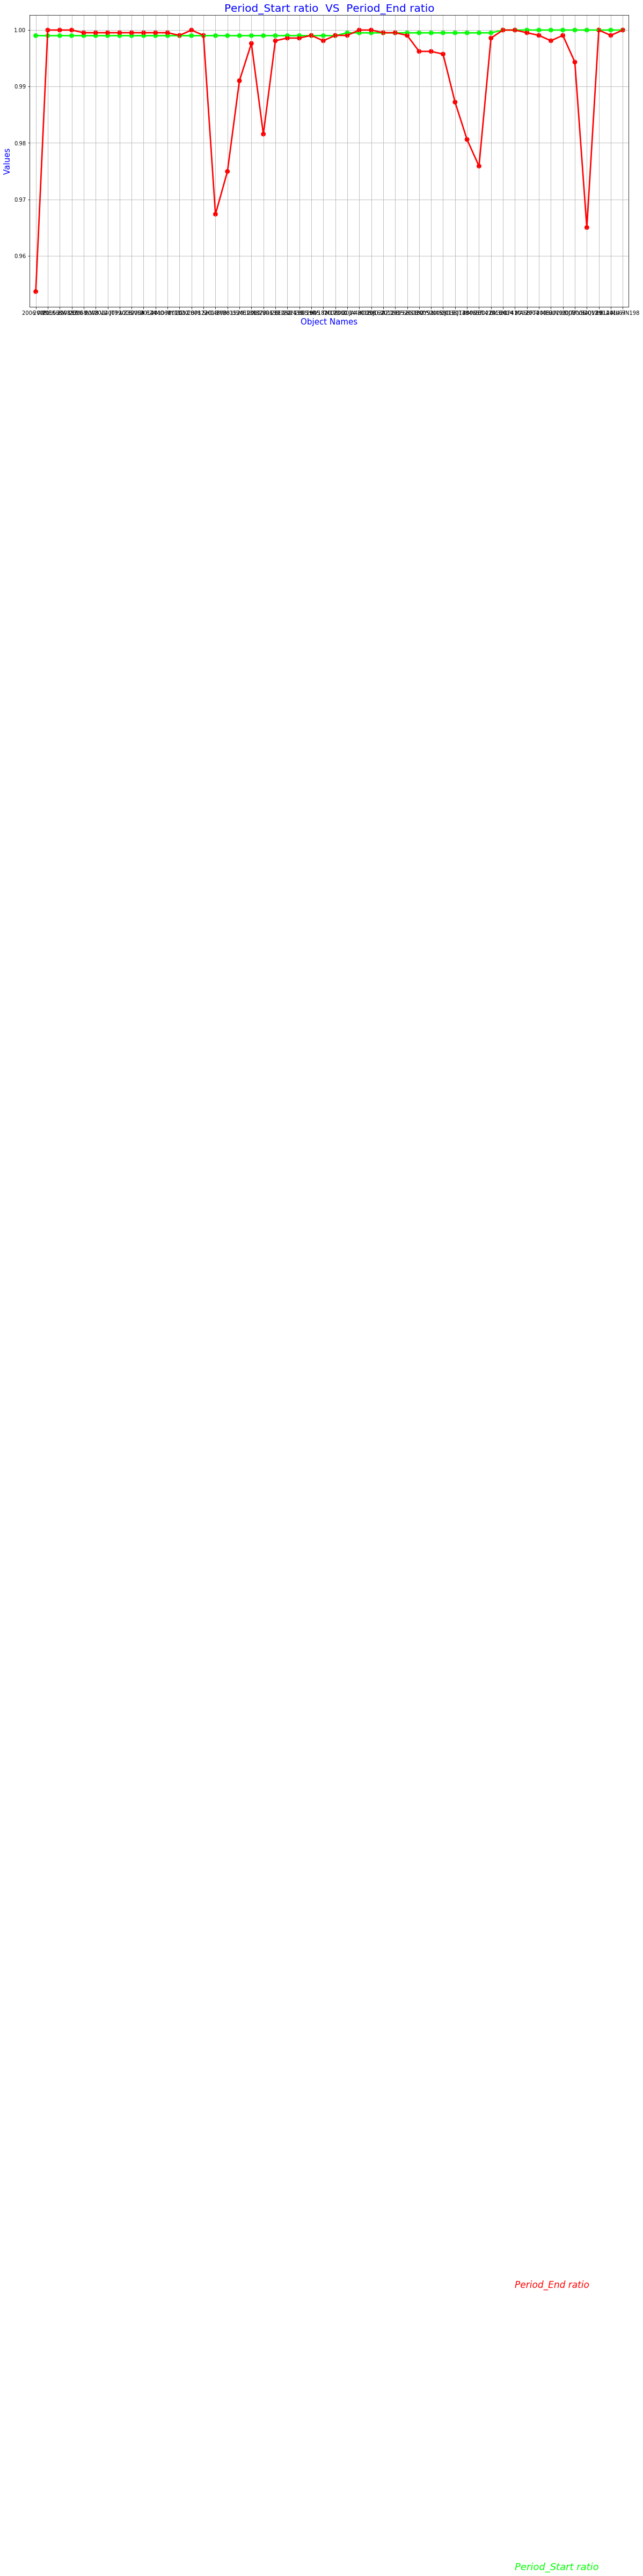

In [33]:
# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='object_list',y='Period_Start_ratio',data=data4,color='lime',alpha=0.8)
sns.pointplot(x='object_list',y='Period_End_ratio',data=data4,color='red',alpha=0.8)
plt.text(40,0.6,'Period_End ratio',color='red',fontsize = 17,style = 'italic')   # burdaki degerler yazilarin konumlari istedigimiz gibi degistirebiliriz
plt.text(40,0.55,'Period_Start ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('Object Names',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Period_Start ratio  VS  Period_End ratio',fontsize = 20,color='blue')
plt.grid()
